## Bayesian Linear Regression

In this tutorial we will learn how to find the parameters of a guassian distribution from which we can sample weights to fit the dataset. Then we an use this distribution as a prior to find the predictive distribution and make use of the confidence levels.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20,15
rcParams.update({'font.size':25})
from warnings import filterwarnings
filterwarnings('ignore')

## Generating the data

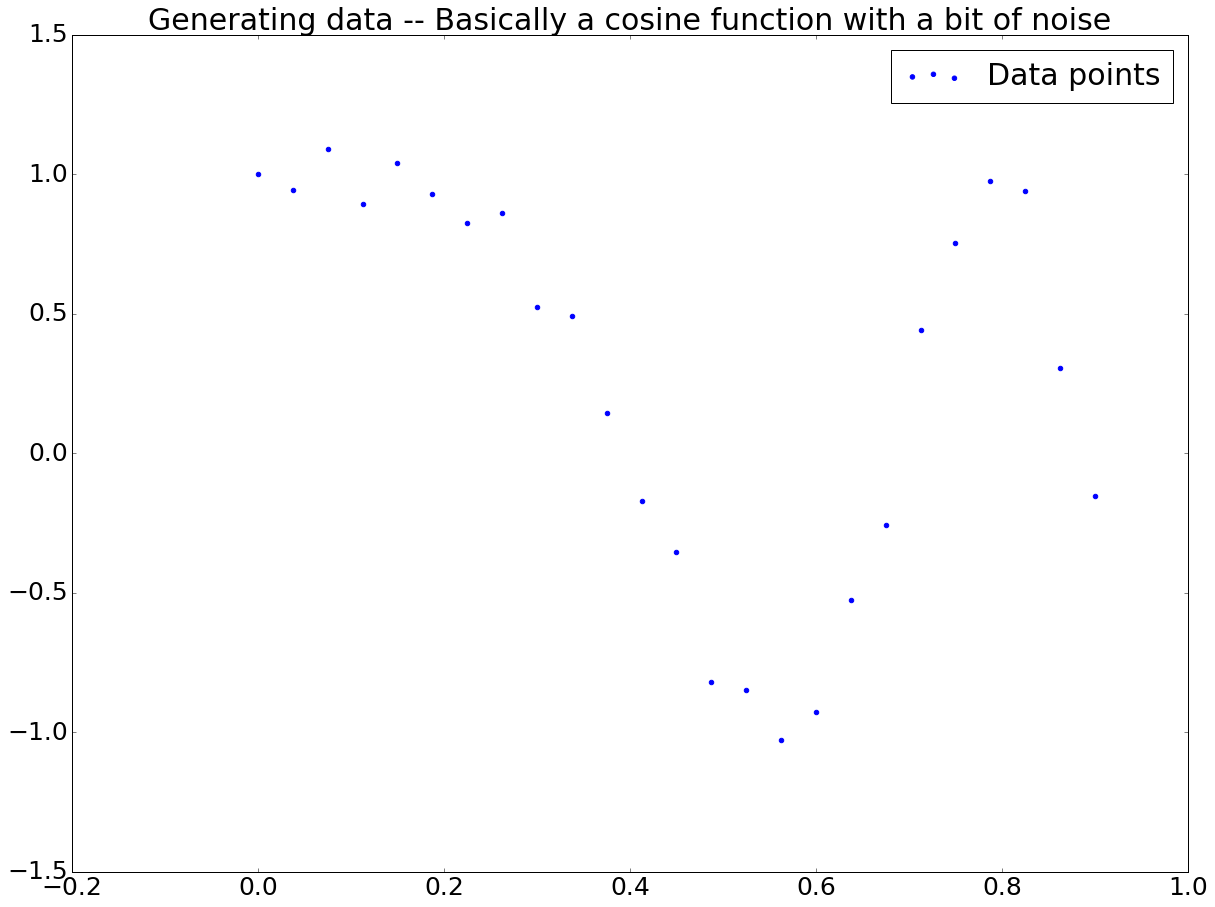

In [4]:
N = 25
x = np.reshape(np.linspace(0,0.9,N),(N,1))
y = np.cos(10*x**2) + 0.1 * np.sin(100*x)

def plot_it(title):
    plt.scatter(x,y, color='blue',label='Data points')
    plt.title(title)
    plt.legend()
    plt.show()

plot_it('Generating data -- Basically a cosine function with a bit of noise')

In [6]:
def gaussian(x,mean,scale):
    return np.array(np.append(np.ones(x.shape[0]),
                              np.array([np.exp(-(x - mu) ** 2/(2*scale**2)) for mu in mean])).reshape(1+len(mean),len(x)).T)


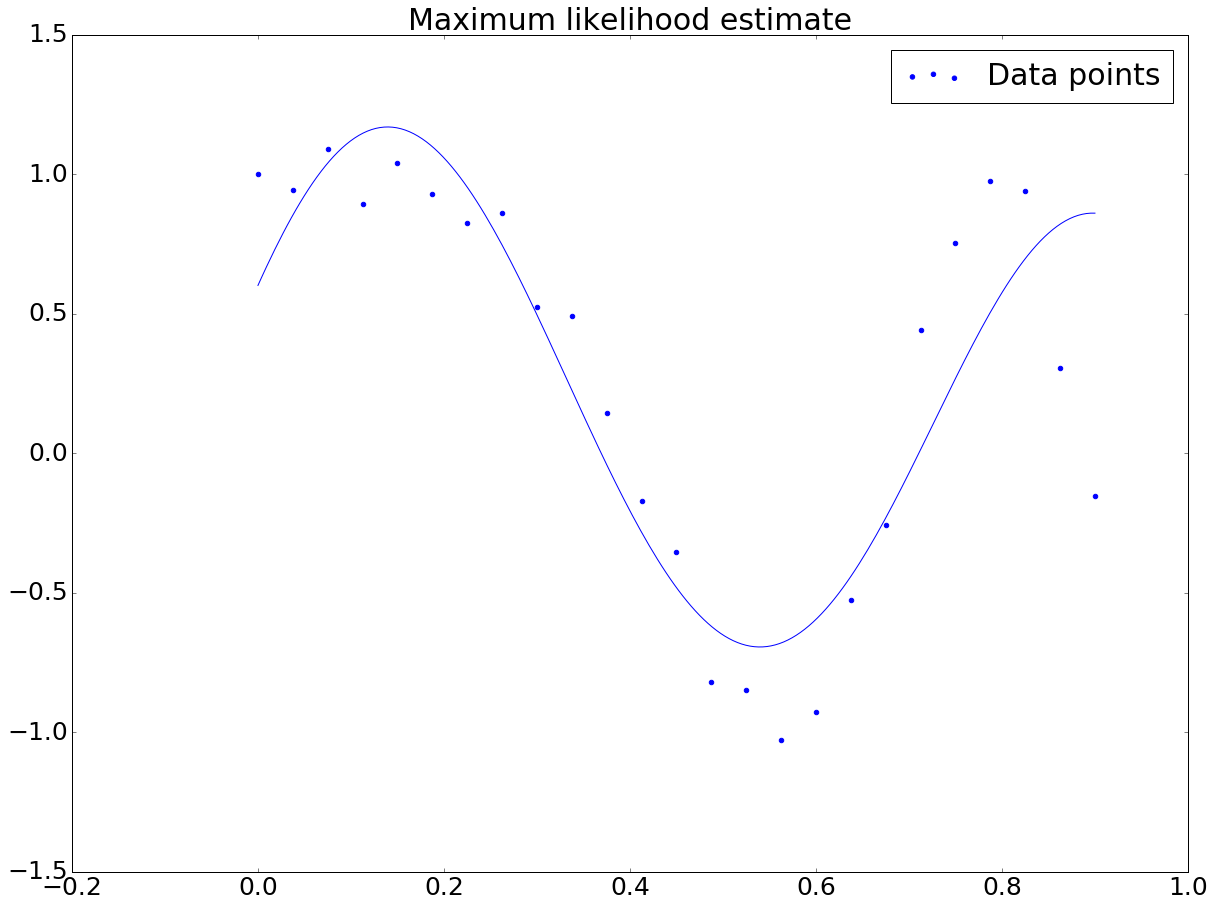

In [7]:
points = np.reshape(np.linspace(0, 0.9, 200), (200, 1))
X_200 = gaussian(points, [0.1, 0.3, 0.9], 0.2)
y_200 = np.cos(10*points**2) + 0.1 * np.sin(100*points)
w = np.linalg.inv(X_200.T @ X_200) @ X_200.T @ y_200
plt.plot(points, X_200 @ w)
plot_it('Maximum likelihood estimate')

In [8]:
X = gaussian(x,np.linspace(-0.5,1,10),0.1)
S = np.identity(x.shape[1])
sigma = np.sqrt(0.2)
S_post = np.linalg.inv(np.linalg.inv(S) + sigma ** (-2) * X.T @ X)
m_post = S_post @ (sigma ** (-2) * X.T @ y)

## Sampling from the posterior

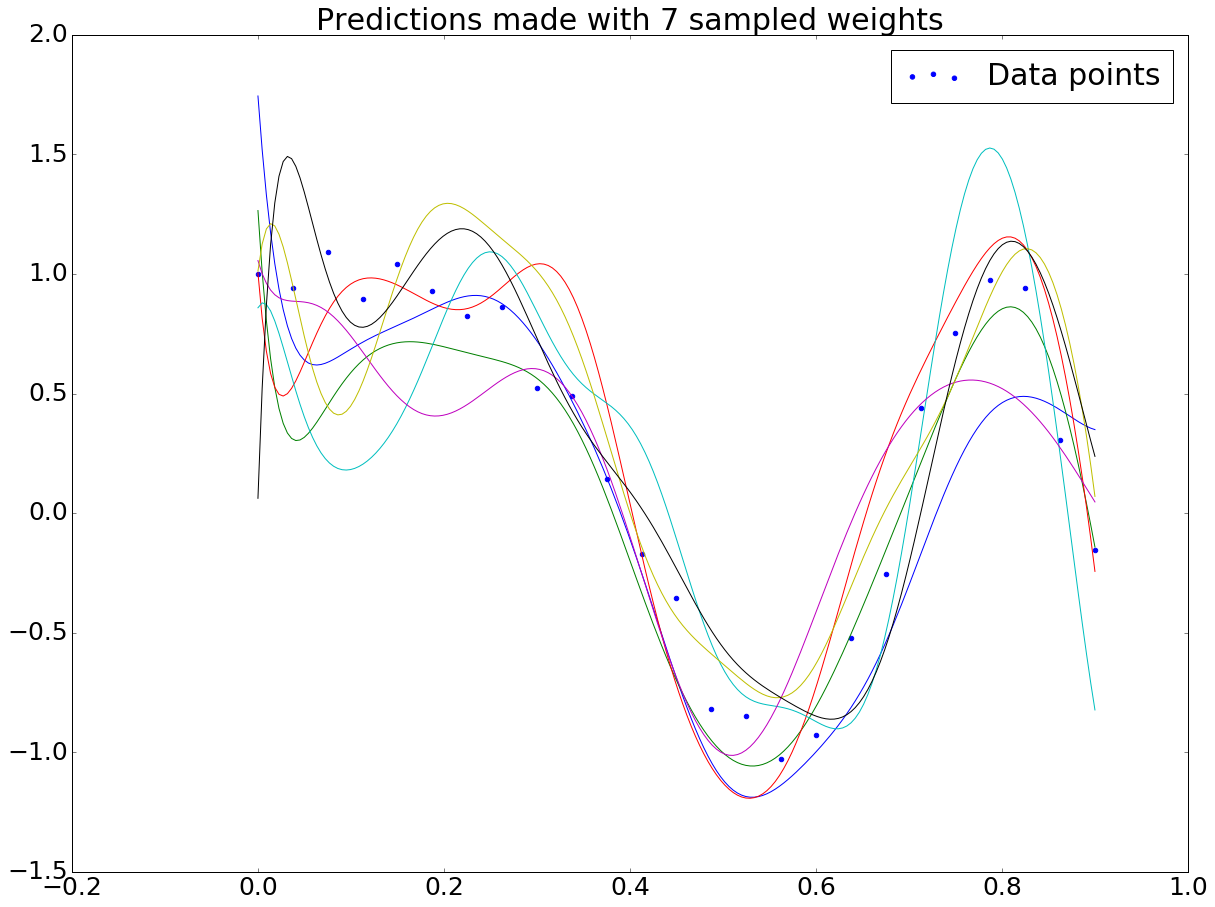

In [9]:
n_weights = 7
X_200 = gaussian(points, np.linspace(-0.5,1,10),0.1)
def plot_some_functions(n_weights):
    for _ in range(n_weights):
        sampled_w = np.random.multivariate_normal(m_post.reshape(11,), S_post)
        plt.plot(points, X_200 @ sampled_w)
plot_some_functions(n_weights)
plot_it('Predictions made with {} sampled weights'.format(n_weights))

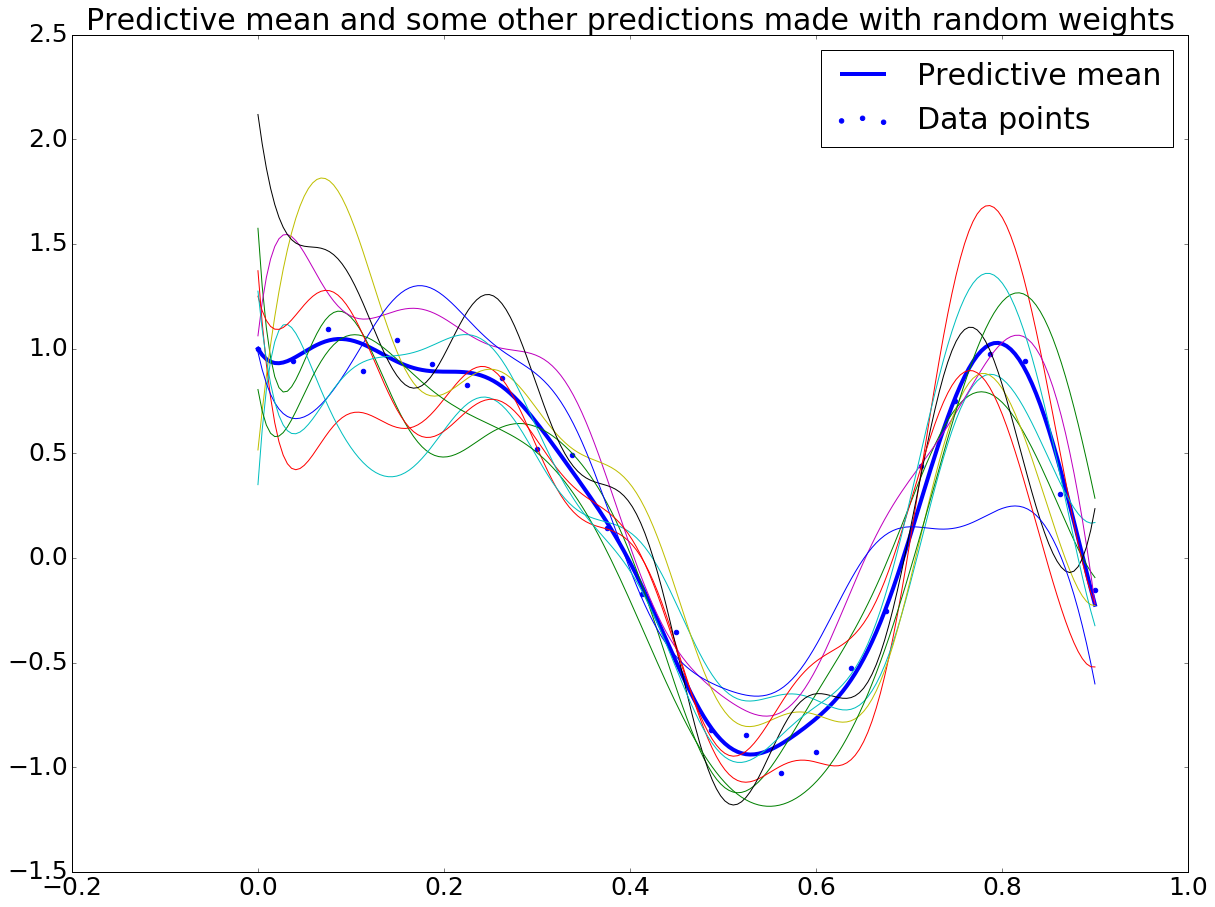

In [10]:
pred_mean = X_200 @ m_post

plt.plot(points, pred_mean, label='Predictive mean', linewidth=4)
plot_some_functions(10)    
plot_it('Predictive mean and some other predictions made with random weights')

## Confidence Intervals

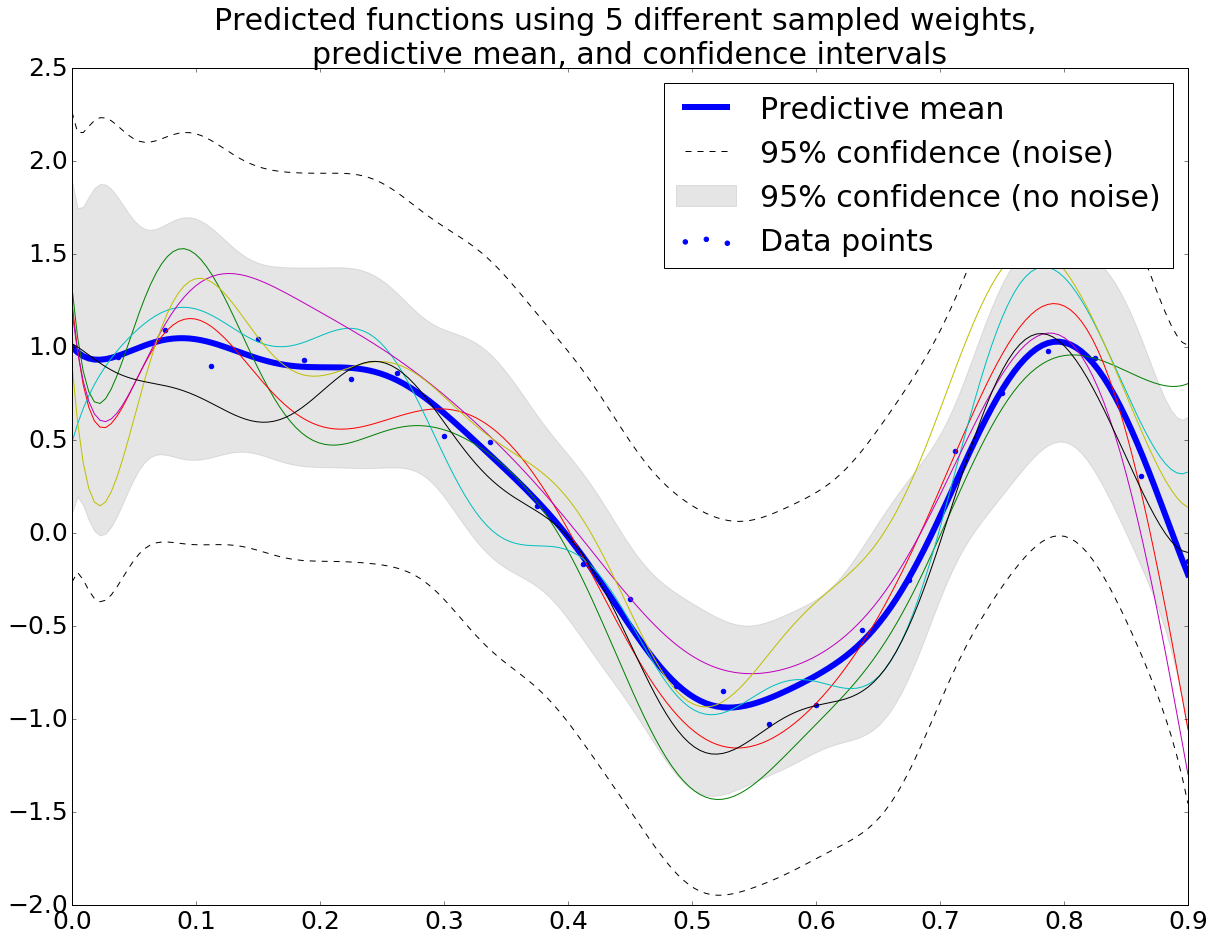

In [14]:
noise = 0.2 
std_noiseless = np.sqrt(X_200 @ S_post @ X_200.T)
std_noise = np.sqrt(std_noiseless ** 2 + noise)
plt.plot(points, pred_mean, label='Predictive mean', linewidth=6)
plot_some_functions(6)

plt.fill_between(points.flatten(), pred_mean.flatten() - np.diag(2 * std_noiseless),
                        pred_mean.flatten() + np.diag(2* std_noiseless), color='grey',
                        alpha=0.2, label='95% confidence (no noise)')

plt.plot(points.flatten(), pred_mean.flatten() - np.diag(2 * std_noise), '--', label='95% confidence (noise)', color='black')
plt.plot(points.flatten(), pred_mean.flatten() + np.diag(2 * std_noise), '--', color='black')

plt.xlim(0, 0.9) # Looks better
plt.ylim(-2, 2.5)
plot_it('Predicted functions using 5 different sampled weights, \npredictive mean, and confidence intervals')